In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

Import the dataset

In [5]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

Implementing Thompson Sampling

In [12]:
N = 10000
d = 10
ads_selected = []
total_reward = 0
number_of_rewards_1 = [0] * d
number_of_rewards_0 = [0] * d

for n in range (0, N):
    ad = 0
    max_random = 0
    
    for i in range (0, d):
        random_beta = random.betavariate(number_of_rewards_1[i] + 1, number_of_rewards_0[i] + 1)
        
        if (random_beta > max_random):
            max_random = random_beta
            ad = i            
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    
    if (reward == 1):
        number_of_rewards_1[ad] = number_of_rewards_1[ad] + 1
    else:
        number_of_rewards_0[ad] = number_of_rewards_0[ad] + 1
    
    total_reward = total_reward + reward

Visualising the results

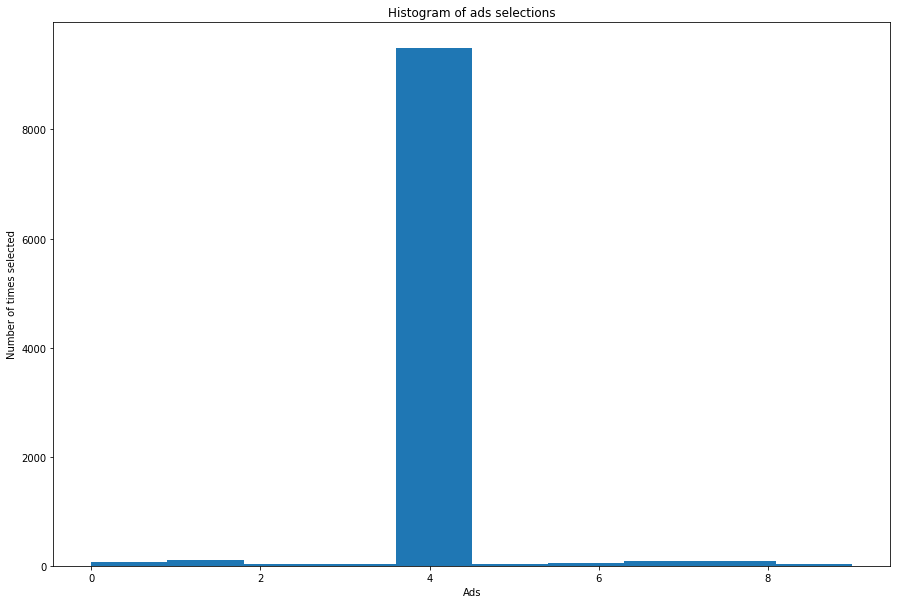

In [14]:
plt.figure(figsize = [15, 10])
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times selected')
plt.show()